<a href="https://colab.research.google.com/github/JoaoDiamantino/clusterization_python/blob/main/Cluster_Exercicios_Favero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercícios do Capítulo 9 do livro "Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®"**

#Q1 
(Fonte: Fávero & Belfiore (2017, Capítulo 9, Exercício 1)

O departamento de concessão de bolsas de estudo de uma faculdade deseja investigar a relação de interdependência entre os estudantes ingressantes em determinado ano letivo, com base apenas em duas variáveis 
métricas (idade, em anos, e renda média familiar, em R$). O objetivo é propor uma quantidade ainda desconhecida de novos programas de concessão de bolsas voltados a grupos homogêneos de alunos. Para tanto, 
foram coletados os dados dos 100 novos estudantes e elaborada uma base, que se encontra nos arquivos Bolsa 
de Estudo.sav e Bolsa de Estudo.dta, com as seguintes variáveis: 


*estudante*: Variável string que identifica o estudante ingressante na faculdade. 

*idade*: Idade do estudante (anos). 

*renda*: Renda média familiar (R$). 

In [1]:
import pandas as pd


In [2]:
url = 'https://github.com/JoaoDiamantino/clusterization_python/raw/main/Bolsa_de_Estudos.xlsx'

df = pd.read_excel(url)

In [3]:
df.describe()

,idade,renda
count,100.000000,100.000000
mean,30.550000,1753.000000
std,7.249347,2560.478767
min,21.000000,1100.000000
25%,27.000000,1300.000000
50%,30.000000,1500.000000
75%,33.000000,1700.000000
max,82.000000,27000.000000


##Q1.a

Elabore uma análise de agrupamentos por meio de um esquema de aglomeração hierárquico, com método de encadeamento completo (jurthest neighbor) e distância quadrática euclidiana. Apresente apenas 
a parte final da tabela do esquema de aglomeração e discuta os resultados. Lembrete: Como as variáveis possuem unidades distintas de medida, é necessária a aplicação do procedimento de padronização 
Zscores para a correta elaboração da análise de agrupamentos. 


**passo 1:** padronizar os dados númericos

In [4]:
# importando biblioteca Stats para padronização com Zscores
import scipy.stats as stats

In [5]:
Zcols = df.drop(columns=['estudante'])

for i in Zcols:
  df[i] = stats.zscore(df[i])
 


In [6]:
df.head()

,estudante,idade,renda
0,Gabriela,0.339664,-0.099307
1,Luiz Felipe,-0.492166,-0.099307
2,Patrícia,-0.492166,-0.060055
3,Ovídio,-0.076251,-0.060055
4,Leonor,0.755579,0.018448


**passo 2:** Método Hierárquico com método de encadeamento completo e  distância quadrática eucliana

In [7]:
import scipy.cluster.hierarchy as sch

In [8]:
Zcols = df.drop(columns=['estudante'])
encadeamento = sch.linkage(Zcols, method = 'complete', metric = 'sqeuclidean')

**passo 3** Análise pelo Dendogramna

In [9]:
import matplotlib.pyplot as plt

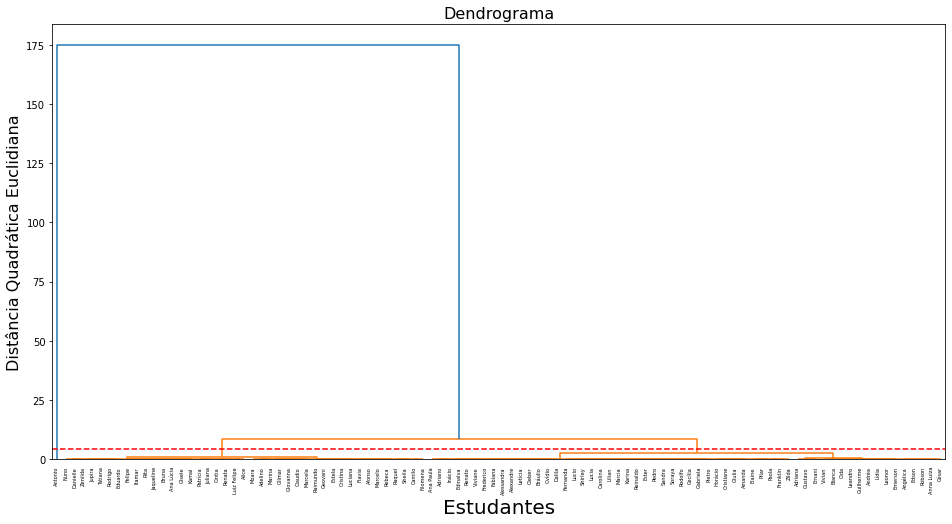

In [10]:
plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(encadeamento, labels = list(df.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Estudantes', fontsize=20)
plt.ylabel('Distância Quadrática Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

##Q1.b

Com base na tabela do item anterior e no dendrograma, pergunta-se: Há indícios de serem formados 
quantos agrupamentos de estudantes? 

Resposta:
*Há indícios de serem formados 2 clusters na disposição atual dos dados*


##Q2.c

É possível identificar um ou mais estudantes muito discrepantes dos demais em relação às duas variáveis 
em análise? 


In [11]:
df.describe(percentiles =[.25, .5, .75, .90,.95, .99])

,idade,renda
count,1.000000e+02,1.000000e+02
mean,-7.882583e-17,-1.970646e-17
std,1.005038e+00,1.005038e+00
min,-1.323997e+00,-2.563152e-01
25%,-4.921663e-01,-1.778113e-01
50%,-7.625112e-02,-9.930743e-02
75%,3.396641e-01,-2.080353e-02
90%,7.555793e-01,1.844842e-02
95%,1.171494e+00,1.844842e-02
99%,1.642865e+00,2.339416e-01


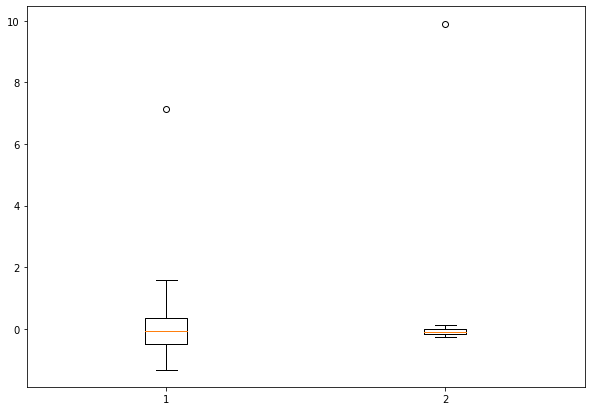

In [12]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot([Zcols['idade'],Zcols['renda']])
plt.show()

Resposta: *Há presença de estudantes com valores discrepantes em relação às variáveis em análise*.

##Q1.d

 Se a resposta do item anterior for positiva, elabore novamente a análise de agrupamentos hierárquicos com 
os mesmos critérios, porém, agora, sem o(s) estudante(s) considerado(s) discrepante(s).A partir da análise 
dos novos resultados, podem ser identificados novos agrupamentos?


**removendo outliers**:


In [13]:
#valores maiores que z=6
out = df.loc[df['idade']>6,:]
out

,estudante,idade,renda
8,Antonio,7.132945,9.90994


In [14]:
# Os valores discrepantes de idade e renda pertencem ao Antônio. Vamos excluí-lo:
df.drop(index = 8, inplace = True)

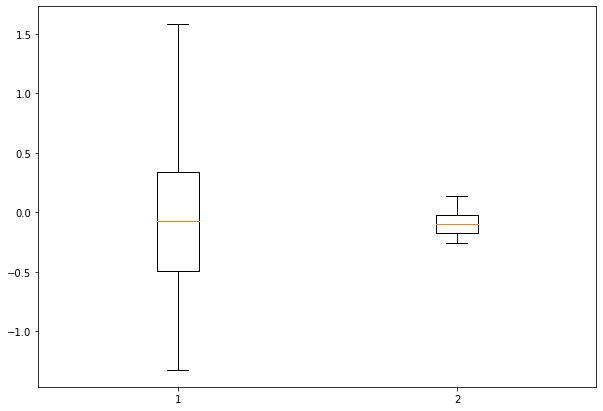

In [15]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot([df['idade'],df['renda']])
plt.show()

**refazendo aglomeração**:

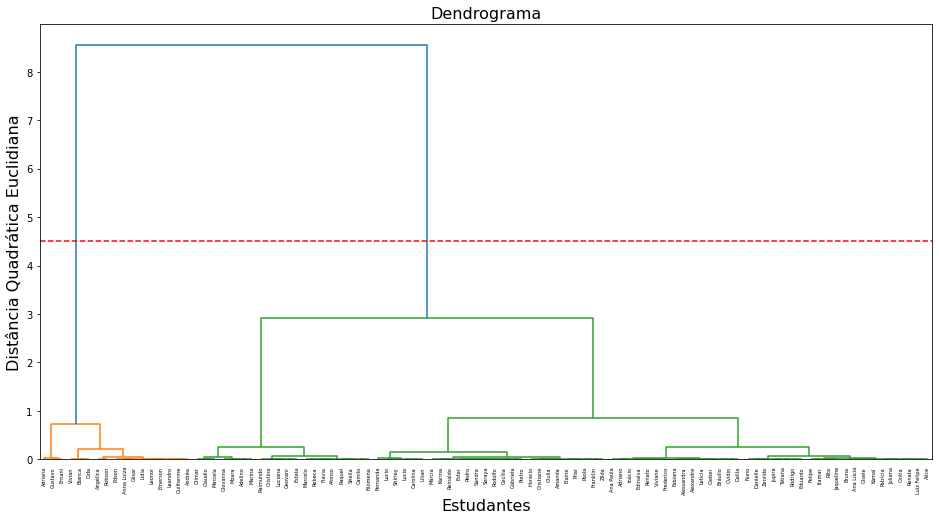

In [16]:
Zcols = df.drop(columns=['estudante'])
encadeamento = sch.linkage(Zcols, method = 'complete', metric = 'sqeuclidean')


plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(encadeamento, labels = list(df.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Estudantes', fontsize=16)
plt.ylabel('Distância Quadrática Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

Resposta: *Sim, houve um rearranjo dos agrupamentos com a remoção dos valores discrepantes*

##Q1.e

Discuta como a presença de outliers pode prejudicar a interpretação dos resultados em análise de agrupamentos. 

Resposta: *A existência de outliers pode fazer com que outras observações não tão similares acabem alocadas em um mesmo agrupamento pelo fato de se afastarem substancialmente da primeira. A reaplicação do método, sem a presença de valores discrepantes, gera novos agrupamentos mais bem estruturados e com maior homogeneidade interna.*
